# Question1: Multiclass Classification

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Section1

In [16]:
data=np.load('mnist.npz',allow_pickle=False)
X,y=data['X'],data['y']

In [17]:
X.shape

(784, 60000)

In [18]:
y.shape

(1, 60000)

In [19]:
X=pd.DataFrame(X.T)
X.head(-5)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
y=pd.DataFrame(data=y.T,columns=["label"])
y.head()

,label
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [22]:
df=pd.concat([X,y],axis=1)
df.head(-5)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
59991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
59992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
59993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


In [27]:
df=df.sample(frac=1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
21624,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.0
27594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.0
2558,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
40922,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.0
53659,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.0


In [28]:
X=df.drop('label',axis=1)
y=df['label']

In [29]:
df.isna().sum()

0        0
1        0
2        0
3        0
4        0
        ..
780      0
781      0
782      0
783      0
label    0
Length: 785, dtype: int64

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


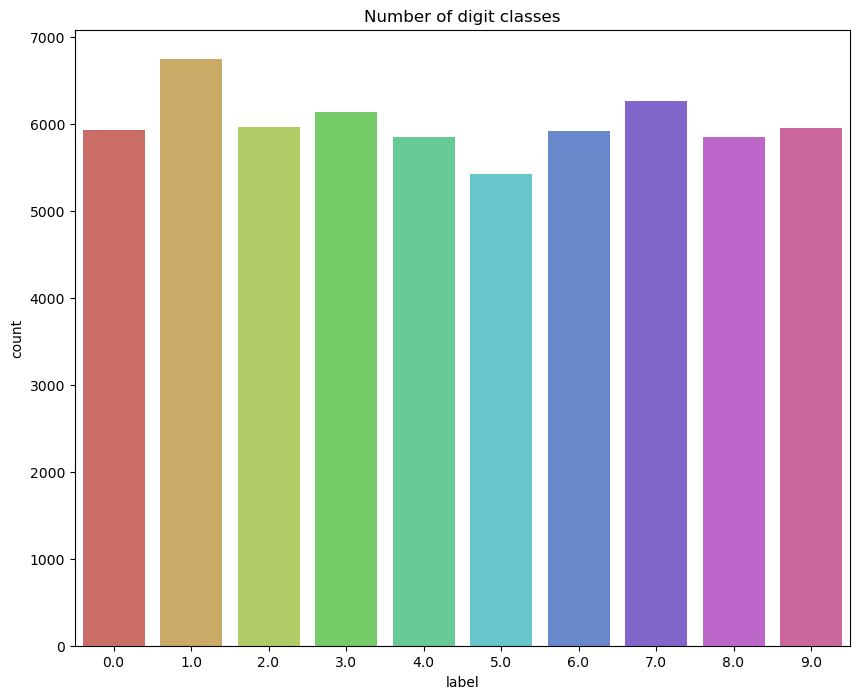

In [32]:
plt.figure(figsize=(10,8))
g=sns.countplot(df['label'],palette='hls')
plt.title('Number of digit classes')
plt.show()

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 21624 to 46754
Columns: 785 entries, 0 to label
dtypes: float64(1), uint8(784)
memory usage: 45.8 MB


In [30]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
count,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0,60000.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0,4.453933
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0,2.889270
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,2.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,4.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,7.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0,9.000000


In [33]:
print(y.iloc[3])

6.0


Text(0.5, 1.0, 'digit 6')

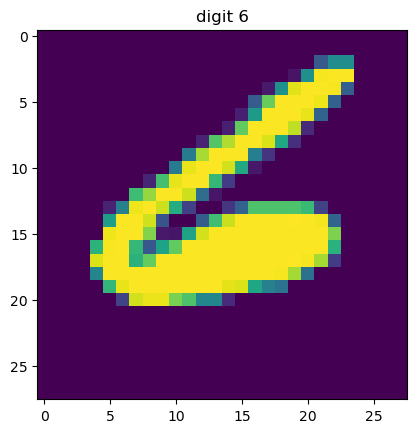

In [35]:
six = X.iloc[3, :]
six = six.values.reshape(28,28)
plt.imshow(six)
plt.title('digit 6')


In [36]:
print(y.iloc[24220])

3.0


Text(0.5, 1.0, 'digit 3')

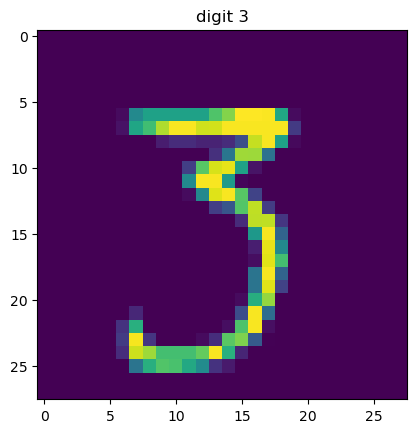

In [37]:
three = X.iloc[24220, :]
three = three.values.reshape(28,28)
plt.imshow(three)
plt.title('digit 3')

# Section2

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [39]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

# Section3

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()
knn_model.fit(X_train_scaled,y_train)
y_pred=knn_model.predict(X_test_scaled)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [41]:
from sklearn.metrics import accuracy_score
knn_accuracy = accuracy_score(y_test, y_pred)
knn_accuracy

0.9403535353535354

In [42]:
k_values = range(1,10)
train_accuracy=[]
test_accuracy=[]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train_scaled, y_train)
    y_train_pred = knn.predict(X_train_scaled)
    y_test_pred = knn.predict(X_test_scaled)
    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))
    print(f"k={k}: Train Accuracy: {np.mean(train_accuracy)} and Test Accuracy: {np.mean(test_accuracy)}")

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

k=1: Train Accuracy: 1.0 and Test Accuracy: 0.9418181818181818


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

k=2: Train Accuracy: 0.9848258706467662 and Test Accuracy: 0.9368686868686869


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

k=3: Train Accuracy: 0.979759535655058 and Test Accuracy: 0.9382828282828283


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

k=4: Train Accuracy: 0.9754042288557213 and Test Accuracy: 0.938510101010101


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

k=5: Train Accuracy: 0.9723532338308457 and Test Accuracy: 0.9388787878787879


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

k=6: Train Accuracy: 0.9696351575456053 and Test Accuracy: 0.9388299663299664


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

k=7: Train Accuracy: 0.9675124378109452 and Test Accuracy: 0.9388744588744589


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

k=8: Train Accuracy: 0.9655348258706468 and Test Accuracy: 0.9386742424242425


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

k=9: Train Accuracy: 0.9638667772249863 and Test Accuracy: 0.9384231200897868


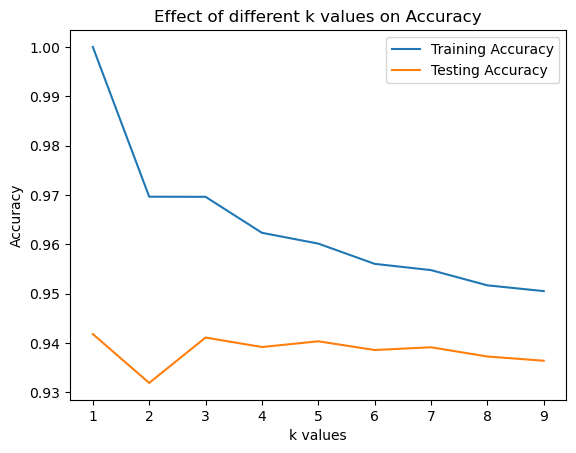

In [43]:
#plot
plt.plot(k_values, train_accuracy, label="Training Accuracy")
plt.plot(k_values, test_accuracy , label="Testing Accuracy")
plt.xlabel('k values')
plt.ylabel('Accuracy')
plt.title('Effect of different k values on Accuracy')
plt.legend()
plt.show()

# Section4

In [44]:
train_dataset=pd.concat([X_train,y_train],axis=1)
train_dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
10207,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
24439,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.0
44528,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.0
1314,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
45870,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.0


In [45]:
test_dataset=pd.concat([X_test,y_test],axis=1)
test_dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
53571,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.0
26488,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.0
3565,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
30005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.0
12185,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0


In [46]:
#separate 2 classes
ninetrain=train_dataset[train_dataset['label']==9]
seventrain=train_dataset[train_dataset['label']==7]
ninetest=test_dataset[test_dataset['label']==9]
seventest=test_dataset[test_dataset['label']==7]

In [47]:
sampletrain=pd.concat([ninetrain,seventrain])
sampletrain=sampletrain.sample(frac=1)
sampletrain

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
45929,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.0
46464,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.0
43949,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.0
44432,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.0
56246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44522,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.0
44926,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.0
47850,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.0
43189,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.0


In [48]:
sampletest=pd.concat([ninetest,seventest])
sampletest=sampletest.sample(frac=1)
sampletest

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
55451,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
55699,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
46516,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.0
58217,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
56745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42618,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.0
45992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.0
59463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
58280,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


In [49]:
#train test split
Xtr_S=sampletrain.drop('label',axis=1)
ytr_S=sampletrain['label']
Xte_S=sampletest.drop('label',axis=1)
yte_S=sampletest['label']

In [51]:
#model training
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score,KFold
model=SVC(C=1,kernel='rbf') 
model.fit(Xtr_S,ytr_S)
ypred=model.predict(Xte_S)

cv = KFold(n_splits=5,shuffle=True, random_state=42)
scores = cross_val_score(model, Xtr_S, ytr_S, cv=cv)
print(f'mean acc for class 7 and 9 (Kfold cv): {np.mean(scores)}')

mean acc for class 7 and 9 (Kfold cv): 0.9861650880216107


# Section5

In [52]:
test_accs=[]
for i in range(10):
    for j in range(i,10):
        if i!=j:
            sampletrain=pd.concat([train_dataset[train_dataset['label']==i],train_dataset[train_dataset['label']==j]])
            sampletrain=sampletrain.sample(frac=1)
            sampletest=pd.concat([test_dataset[test_dataset['label']==i],test_dataset[test_dataset['label']==j]])
            Xtr_S=sampletrain.drop('label',axis=1)
            ytr_S=sampletrain['label']
            Xte_S=sampletest.drop('label',axis=1)
            yte_S=sampletest['label']
            svc_model=model.fit(Xtr_S,ytr_S)
            y_pred_tr=svc_model.predict(Xtr_S)
            train_acc=accuracy_score(ytr_S,y_pred_tr)
            y_pred_t=svc_model.predict(Xte_S)
            test_acc=accuracy_score(yte_S,y_pred_t)
            test_accs.append(test_acc)
            print(f'Class {i} and {j} : Train acc:{train_acc} and Test acc:{test_acc}')
print(f"min test acc: {min(test_accs)}")

Class 0 and 1 : Train acc:0.9998819780479169 and Test acc:0.9992843511450382
Class 0 and 2 : Train acc:0.9988769653107062 and Test acc:0.9956038272562711
Class 0 and 3 : Train acc:0.9993838570548367 and Test acc:0.9982228992129982
Class 0 and 4 : Train acc:0.9991180546806098 and Test acc:0.9968652037617555
Class 0 and 5 : Train acc:0.9984129083454569 and Test acc:0.9973565952947396
Class 0 and 6 : Train acc:0.9982473710565849 and Test acc:0.9963664676875162
Class 0 and 7 : Train acc:0.9998779594825482 and Test acc:0.9987481221832749
Class 0 and 8 : Train acc:0.9983435270132518 and Test acc:0.9969434538970963
Class 0 and 9 : Train acc:0.9984890455804584 and Test acc:0.9964376590330789
Class 1 and 2 : Train acc:0.9985913839652542 and Test acc:0.9956948098541019
Class 1 and 3 : Train acc:0.9994199535962877 and Test acc:0.9969433341170938
Class 1 and 4 : Train acc:0.9990523572613125 and Test acc:0.9973442781265089
Class 1 and 5 : Train acc:0.9997520456236053 and Test acc:0.9990236758603857

class 3 and 8: 0.9857035364936042 #min acc



class 3 and 5: 0.9869927159209158

class 4 and 9: 0.9896907216494846

# Section6

In [53]:

models_pred=[]
for i in range(10):
    for j in range(i,10):
        svm_models=[] 
        if i!=j:
            sampletrain=pd.concat([train_dataset[train_dataset['label']==i],train_dataset[train_dataset['label']==j]])
            sampletrain=sampletrain.sample(frac=1)
            sampletest=pd.concat([test_dataset[test_dataset['label']==i],test_dataset[test_dataset['label']==j]])
            Xtr_S=sampletrain.drop('label',axis=1)
            ytr_S=sampletrain['label']
            Xte_S=sampletest.drop('label',axis=1)
            yte_S=sampletest['label']
            svc_model=model.fit(Xtr_S,ytr_S)
            svm_models.append(svc_model)
            for m in svm_models:
                p=m.predict(X_test)
                p=p.tolist()
                models_pred.append(p)

#print(models_pred)

In [54]:
preds_df=pd.DataFrame(models_pred)
preds_df

,0,1,2,3,4,5,6,7,8,9,...,19790,19791,19792,19793,19794,19795,19796,19797,19798,19799
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,3.0,0.0,0.0,3.0,3.0,0.0,3.0,0.0,3.0,3.0,...,3.0,3.0,0.0,3.0,3.0,0.0,3.0,3.0,0.0,3.0
3,4.0,4.0,0.0,4.0,0.0,4.0,0.0,4.0,4.0,0.0,...,4.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,0.0,4.0
4,5.0,0.0,0.0,5.0,5.0,5.0,5.0,0.0,5.0,5.0,...,5.0,5.0,0.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
5,6.0,6.0,0.0,6.0,0.0,6.0,0.0,6.0,6.0,0.0,...,6.0,6.0,0.0,0.0,6.0,6.0,6.0,6.0,6.0,6.0
6,7.0,7.0,0.0,7.0,7.0,7.0,7.0,0.0,7.0,0.0,...,7.0,7.0,7.0,7.0,7.0,7.0,0.0,7.0,0.0,7.0
7,8.0,0.0,0.0,8.0,8.0,8.0,8.0,0.0,8.0,8.0,...,8.0,8.0,0.0,8.0,8.0,8.0,8.0,8.0,0.0,8.0
8,9.0,9.0,0.0,9.0,9.0,9.0,9.0,0.0,9.0,0.0,...,9.0,9.0,9.0,9.0,0.0,9.0,0.0,9.0,0.0,9.0
9,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,...,1.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0


In [55]:
svm45_y_preds=[]
for i in range(19800):
    Name_list = preds_df[i].tolist()
    b=np.bincount(Name_list).argmax()
    svm45_y_preds.append(b)
    
print('y_pred by 45 svms:',svm45_y_preds)

y_pred by 45 svms: [8, 4, 0, 4, 1, 4, 5, 6, 9, 5, 2, 1, 7, 5, 1, 0, 9, 3, 2, 6, 8, 0, 6, 6, 6, 8, 7, 6, 3, 2, 8, 7, 4, 2, 2, 3, 4, 0, 7, 6, 8, 7, 9, 6, 1, 3, 7, 5, 7, 2, 5, 5, 8, 0, 3, 1, 8, 4, 0, 8, 3, 9, 2, 6, 0, 8, 8, 1, 0, 6, 1, 8, 5, 6, 0, 4, 2, 4, 0, 6, 4, 7, 2, 6, 8, 9, 7, 6, 4, 9, 3, 9, 5, 2, 5, 8, 8, 8, 3, 8, 6, 2, 4, 6, 9, 9, 9, 7, 8, 1, 6, 1, 5, 0, 6, 3, 7, 9, 8, 3, 6, 7, 4, 3, 1, 5, 8, 8, 9, 3, 9, 4, 2, 1, 7, 6, 2, 5, 8, 8, 3, 9, 5, 3, 0, 8, 1, 9, 3, 0, 1, 5, 3, 5, 2, 1, 4, 5, 4, 9, 1, 6, 7, 1, 4, 8, 2, 4, 2, 2, 5, 6, 1, 3, 5, 5, 3, 2, 0, 8, 6, 3, 7, 6, 2, 4, 0, 5, 8, 7, 9, 8, 6, 1, 0, 4, 3, 3, 1, 1, 2, 4, 3, 7, 0, 8, 6, 5, 0, 4, 4, 4, 6, 6, 7, 0, 5, 6, 6, 5, 5, 2, 9, 1, 9, 6, 9, 6, 0, 6, 8, 7, 5, 1, 1, 7, 1, 7, 7, 1, 3, 6, 1, 2, 8, 4, 1, 1, 3, 2, 4, 2, 6, 5, 3, 7, 9, 7, 8, 7, 7, 7, 6, 8, 1, 7, 1, 5, 1, 8, 0, 7, 7, 7, 7, 9, 0, 7, 1, 5, 0, 0, 9, 7, 8, 0, 9, 8, 1, 7, 6, 7, 2, 9, 6, 7, 3, 8, 9, 3, 5, 5, 2, 6, 7, 3, 3, 2, 0, 6, 3, 3, 7, 2, 8, 6, 5, 7, 7, 9, 9, 1, 0, 8, 3, 5, 2,

In [56]:
#evaluate model
acc_45svms=accuracy_score(y_test,svm45_y_preds)
print('accuracy of our model:',acc_45svms)

accuracy of our model: 0.9751515151515151


In [58]:
sk_model=SVC(decision_function_shape='ovo')
sk_model.fit(X_train,y_train)
sk_svm_pred=sk_model.predict(X_test)
sk_svm_acc=accuracy_score(y_test,sk_svm_pred)
print('accuracy of sklearn svm model(by ovo):',sk_svm_acc)

accuracy of sklearn svm model(by ovo): 0.9754545454545455


# Section7

In [61]:
best_knn_model=KNeighborsClassifier(n_neighbors=7).fit(X_train_scaled, y_train)
knn_y_pred = knn.predict(X_test_scaled)
best_knn_acc=accuracy_score(y_test, knn_y_pred)
print('Accuracy for best knn model:',best_knn_acc)
print('Accuracy for svm model:',acc_45svms)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy for best knn model: 0.9364141414141414
Accuracy for svm model: 0.9751515151515151
